# Decision Tree

In [ ]:
import math
import warnings
from datetime import datetime
start=datetime.now()
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn import tree,model_selection
from sklearn.grid_search import GridSearchCV
# A convenience for displaying visualizations.
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [287]:
data = pd.read_csv('C:/Personal/09142640/Downloads/Car_sales_U.csv')
data.columns.values[3]='Year_Resale_Value'
data_req=data.loc[:,["Sales_in_thousands","Year_Resale_Value","Price_in_thousands","Engine_size","Horsepower","Wheelbase","Width","Length","Curb_weight","Fuel_capacity","Fuel_efficiency","Power_perf_factor"]]
data_na=data_req.fillna(0)
#data_req=data_na.astype('float')
#data_na.dtype()

In [288]:
Y = data_na[['Sales_in_thousands']].astype('int')
X = data_na.drop(columns='Sales_in_thousands').astype('int')
X.head(5)


,Year_Resale_Value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16,21,1,140,101,67,172,2,13,28,58
1,19,28,3,225,108,70,192,3,17,25,91
2,18,0,3,225,106,70,192,3,17,26,0
3,29,42,3,210,114,71,196,3,18,22,91
4,22,23,1,150,102,68,178,2,16,27,62


In [289]:
#creating variables for training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [290]:
# Creating decision tree using the training data
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=4,
    max_depth=4
)
#decision_tree.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
import pydotplus
import graphviz
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns
)
graph = pydotplus.graph_from_dot_data(dot_data)
#Image(graph.create_png())

In [291]:
#Using Grid search  for finding the best set of parameters
dt_grid={'max_depth':[3,4,5],'criterion':['gini','entropy']}
grid_class=model_selection.GridSearchCV(decision_tree,dt_grid,refit=True,cv=2,return_train_score=True)
grid_class.fit(X_train, y_train)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=2, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [292]:
#Displaying the parameters using Grid search
results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'criterion': 'gini', 'max_depth': 3}, {'criterion': 'gini', 'max_depth': 4}, {'criterion': 'gini', 'max_depth': 5}, {'criterion': 'entropy', 'max_depth': 3}, {'criterion': 'entropy', 'max_depth': 4}, {'criterion': 'entropy', 'max_depth': 5}]
[0.026 0.026 0.026 0.043 0.    0.009]
[0.244 0.289 0.426 0.242 0.411 0.671]
{'criterion': 'entropy', 'max_depth': 3}
0.042735042735042736
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


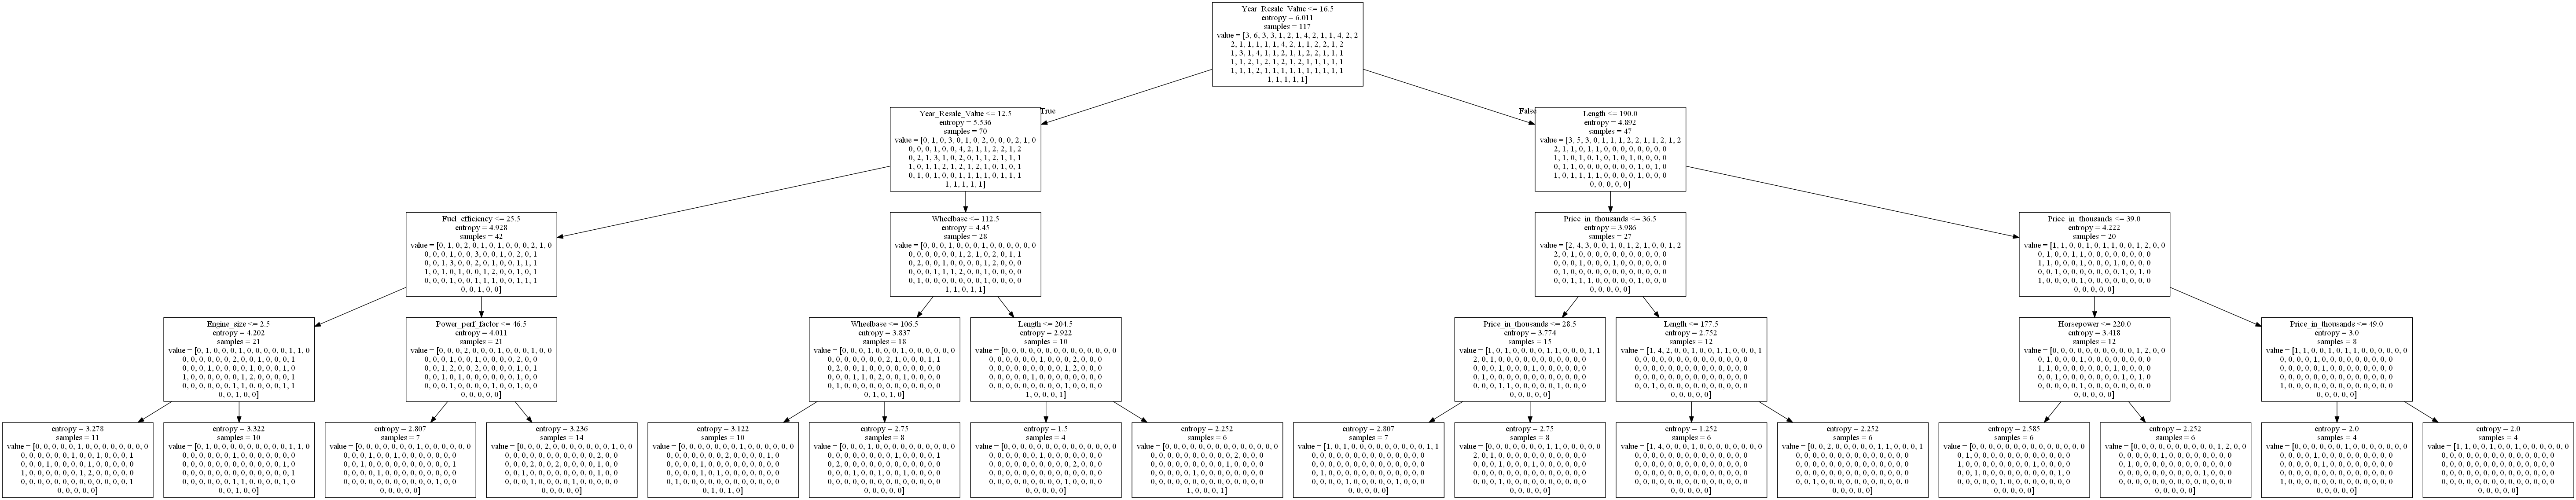

In [70]:
#Using paramters provided by  Grid search above to build the decision tree
decision_tree1 = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

#decision_tree.fit(X_train, y_train)
decision_tree1.fit(X_train, y_train)
import pydotplus
import graphviz
# Render our tree.
dot_data1 = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns
)
graph = pydotplus.graph_from_dot_data(dot_data1)
Image(graph.create_png())

In [293]:
#holdout and cross validation for the decision tree
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)
print('With 40% Holdout: ' + str(decision_tree.fit(X_train, y_train.astype('int')).score(X_test, y_test.astype('int'))))
print('Testing on Sample: ' + str(decision_tree.fit(X, Y.astype('int')).score(X, Y.astype('int'))))

With 40% Holdout: 0.031746031746031744
Testing on Sample: 0.1987179487179487


In [294]:
#Cross Vaidation
from sklearn.model_selection import cross_val_score
cross_val_score(decision_tree1, X, Y.astype('int'), cv=6)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


array([0.011, 0.027, 0.111, 0.111, 0.333, 1.   ])

In [296]:
#Classification Report
ypred = decision_tree.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(ypred, y_test))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         2
          3       1.00      0.12      0.22         8
          4       0.00      0.00      0.00         0
          5       1.00      0.20      0.33         5
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         5
          9       1.00      0.25      0.40         4
         11       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         6
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         4
         18       0.00      0.00      0.00         0
         21       0.00      0.00      0.00         1
         23       0.00      0.00      0.00         0
         24       0.25      0.33      0.29   

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [297]:
#Using PCA

features_pca =data.loc[:,["Year_Resale_Value","Price_in_thousands","Engine_size","Horsepower","Wheelbase","Width","Length","Curb_weight","Fuel_capacity","Fuel_efficiency","Power_perf_factor"]].fillna(0)

In [298]:
# The NumPy covariance function assumes that variables are reprensented by rows, not columns, so we transpose X.
Xt = X_train.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.629e+02  1.766e+02  7.698e+00  6.188e+02 -7.069e+00  1.017e+01
  -3.904e+00  2.659e+00  1.376e+01 -2.400e+01  2.883e+02]
 [ 1.766e+02  2.318e+02  1.170e+01  8.401e+02  3.807e+00  1.937e+01
   2.282e+01  4.694e+00  2.513e+01 -3.536e+01  3.890e+02]
 [ 7.698e+00  1.170e+01  1.433e+00  6.545e+01  3.831e+00  3.012e+00
   7.579e+00  5.316e-01  3.291e+00 -4.035e+00  2.804e+01]
 [ 6.188e+02  8.401e+02  6.545e+01  4.197e+03  1.269e+02  1.396e+02
   3.299e+02  2.288e+01  1.373e+02 -1.890e+02  1.826e+03]
 [-7.069e+00  3.807e+00  3.831e+00  1.269e+02  6.598e+01  1.957e+01
   9.403e+01  3.301e+00  2.393e+01 -2.068e+01  4.767e+01]
 [ 1.017e+01  1.937e+01  3.012e+00  1.396e+02  1.957e+01  1.332e+01
   3.557e+01  1.598e+00  1.150e+01 -1.124e+01  5.782e+01]
 [-3.904e+00  2.282e+01  7.579e+00  3.299e+02  9.403e+01  3.557e+01
   1.931e+02  5.507e+00  3.769e+01 -3.313e+01  1.282e+02]
 [ 2.659e+00  4.694e+00  5.316e-01  2.288e+01  3.301e+00  1.598e+00
   5.507e+00  6.353e-01  2.695

In [299]:

X_pca = StandardScaler().fit_transform(features_pca)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

In [300]:

sklearn_pca = PCA(n_components=11)
x_sklearn = sklearn_pca.fit_transform(X_pca)
#regr.fit(x_sklearn, Y)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.58  0.209 0.063 0.042 0.03  0.024 0.019 0.012 0.011 0.007 0.002]


By using PCA, we can see the first 2 features are closely correlated to the output variable so we will keep them

Now we will use these models after doing PCA-

1.GridsearchCV

2.Holdout and cross validation

3.Classification report

In [301]:
Y_pca = data_na[['Sales_in_thousands']].astype('int')
X_pca_fea = data_na[["Year_Resale_Value","Price_in_thousands"]].astype('int')


In [302]:
#using training and test data
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_fea, Y_pca, random_state=1)

In [303]:
decision_tree_pca = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=4
)

decision_tree_pca.fit(X_train_pca, y_train_pca)
import pydotplus
import graphviz
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree_pca, out_file=None,
    feature_names=X_pca_fea.columns
)



In [304]:
#Using Grid search  for finding the best set of parameters
dt_grid_pca={'max_depth':[3,4,5],'criterion':['gini','entropy']}
grid_class_pca=model_selection.GridSearchCV(decision_tree_pca,dt_grid_pca,refit=True,return_train_score=True)
grid_class_pca.fit(X_train_pca, y_train_pca)
#Displaying the parameters using Grid search
results_pca = grid_class_pca.cv_results_
print(results_pca.get('params'))
print(results_pca.get('mean_test_score'))
print(results_pca.get('mean_train_score'))
print(grid_class_pca.best_params_)
print(grid_class_pca.best_score_)
final_model_pca = grid_class_pca.best_estimator_
print(final_model_pca)

[{'criterion': 'gini', 'max_depth': 3}, {'criterion': 'gini', 'max_depth': 4}, {'criterion': 'gini', 'max_depth': 5}, {'criterion': 'entropy', 'max_depth': 3}, {'criterion': 'entropy', 'max_depth': 4}, {'criterion': 'entropy', 'max_depth': 5}]
[0.026 0.034 0.043 0.043 0.026 0.051]
[0.189 0.258 0.349 0.206 0.329 0.526]
{'criterion': 'entropy', 'max_depth': 5}
0.05128205128205128
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


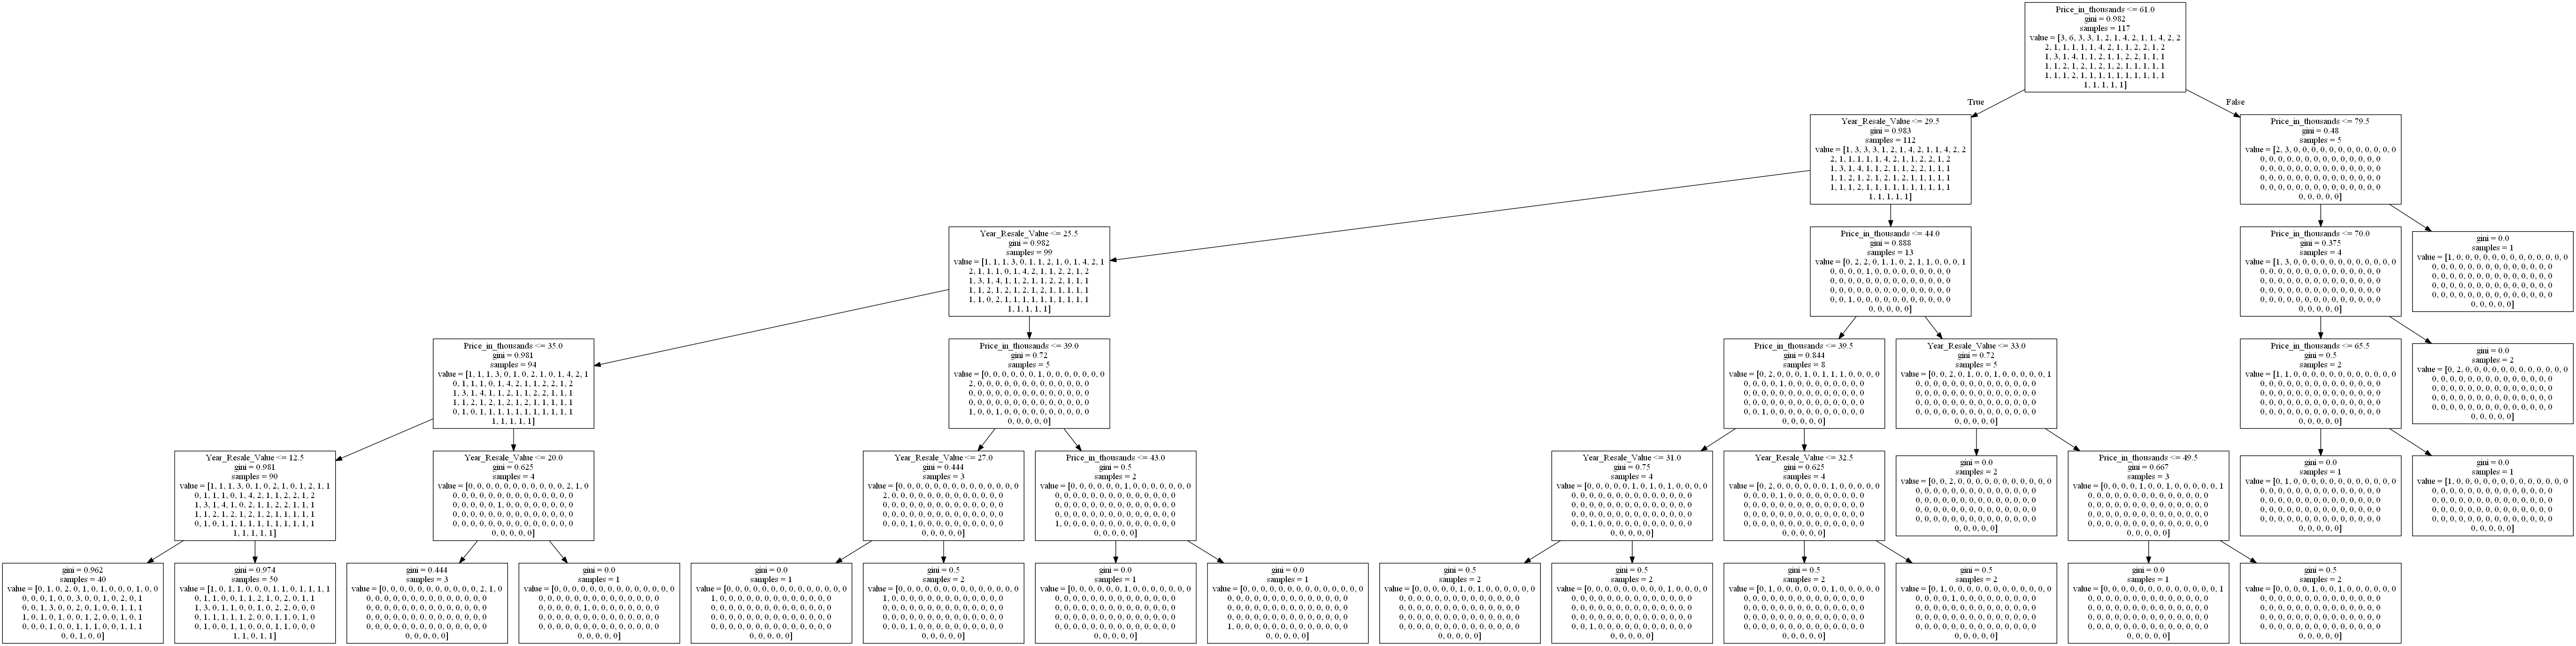

In [305]:
#Using parameters provided by Grid search cv and building the tree
decision_tree_pca = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

#decision_tree.fit(X_train, y_train)
decision_tree_pca.fit(X_train_pca, y_train_pca)
import pydotplus
import graphviz
# Render our tree.
dot_data_pca = tree.export_graphviz(
    decision_tree_pca, out_file=None,
    feature_names=X_pca_fea.columns
)
graph = pydotplus.graph_from_dot_data(dot_data_pca)
Image(graph.create_png())

In [307]:
#holdout and cross validation for the decision tree after PCA
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X_pca_fea, Y_pca, test_size=0.4, random_state=40)
print('With 40% Holdout: ' + str(decision_tree_pca.fit(X_train, y_train.astype('int')).score(X_test, y_test.astype('int'))))
print('Testing on Sample: ' + str(decision_tree_pca.fit(X_pca_fea, Y_pca.astype('int')).score(X_pca_fea, Y_pca.astype('int'))))

With 40% Holdout: 0.047619047619047616
Testing on Sample: 0.21153846153846154


In [308]:
#Cross Vaidation
from sklearn.model_selection import cross_val_score
cross_val_score(decision_tree_pca, X_pca_fea, Y_pca.astype('int'), cv=6)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


array([0.023, 0.027, 0.056, 0.   , 0.   , 1.   ])

In [309]:
#Classification Report
ypred = decision_tree_pca.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(ypred, y_test))

             precision    recall  f1-score   support

          0       1.00      0.20      0.33         5
          1       1.00      0.50      0.67         6
          3       1.00      0.25      0.40         4
          4       0.00      0.00      0.00         0
          5       0.50      0.08      0.13        13
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         0
          9       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         12       1.00      0.33      0.50         6
         13       1.00      0.14      0.25         7
         14       0.00      0.00      0.00         0
         16       1.00      0.12      0.22         8
         18       0.00      0.00      0.00         1
         19       0.00      0.00      0.00         0
         20       0.00      0.00      0.00         0
         21       0.00      0.00      0.00         0
         23       0.00      0.00      0.00   

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Using SelectKbest to get the best features

In [310]:
Y = data_na[['Sales_in_thousands']].astype('int')
X = data_na.drop(columns='Sales_in_thousands').astype('int')
from sklearn.model_selection import train_test_split
import numpy
#Y=Y.reshape(-1,1)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
#sel_kbest = SelectKBest(f_classif, k=2).fit(X_train, y_train)


In [315]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
names = ["Year_Resale_Value","Price_in_thousands","Engine_size","Horsepower","Wheelbase","Width","Length","Curb_weight","Fuel_capacity","Fuel_efficiency","Power_perf_factor"]
for n in range(0, len(names)):
    test = SelectKBest(score_func=chi2, k=2)
    fit = test.fit(X_train, y_train)
    print(names[n], fit.scores_[n])


Year_Resale_Value 646.3153531955787
Price_in_thousands 597.5343790637187
Engine_size 33.06132075471699
Horsepower 1313.1779550448628
Wheelbase 47.00355147645648
Width 14.059999999999999
Length 80.86056440933375
Curb_weight 14.55060422960725
Fuel_capacity 59.95788310412573
Fuel_efficiency 95.03265563152219
Power_perf_factor 632.869515076508


Using selectkbest , we have 2 best features-"Year_Resale_Value","Horsepower"

In [316]:
Y_skb = data_na[['Sales_in_thousands']].astype('int')
X_skb = data_na[["Year_Resale_Value","Horsepower"]].astype('int')

In [317]:
#using training and test data
from sklearn.model_selection import train_test_split

X_train_skb, X_test_skb, y_train_skb, y_test_skb = train_test_split(X_skb, Y_skb, random_state=1)

In [318]:
# Show results
#print('Original number of features:', X_train.shape)
#print('Reduced number of features:', X_kbest.shape)
#print('Reduced number of features:', Y.shape)
decision_tree_skb = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=4
)

decision_tree_skb.fit(X_train_skb, y_train_skb)
import pydotplus
import graphviz

In [319]:
#Using Grid search  for finding the best set of parameters
dt_grid_skb={'max_depth':[3,4,5],'criterion':['gini','entropy']}
grid_class_skb=model_selection.GridSearchCV(decision_tree_skb,dt_grid_skb,refit=True,cv=2,return_train_score=True)
grid_class_skb.fit(X_train_skb, y_train_skb)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=2, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [320]:
#Displaying the parameters using Grid search
results = grid_class_skb.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class_skb.best_estimator_
print(final_model)

[{'criterion': 'gini', 'max_depth': 3}, {'criterion': 'gini', 'max_depth': 4}, {'criterion': 'gini', 'max_depth': 5}, {'criterion': 'entropy', 'max_depth': 3}, {'criterion': 'entropy', 'max_depth': 4}, {'criterion': 'entropy', 'max_depth': 5}]
[0.051 0.043 0.043 0.051 0.051 0.051]
[0.205 0.276 0.362 0.242 0.389 0.649]
{'criterion': 'entropy', 'max_depth': 3}
0.042735042735042736
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


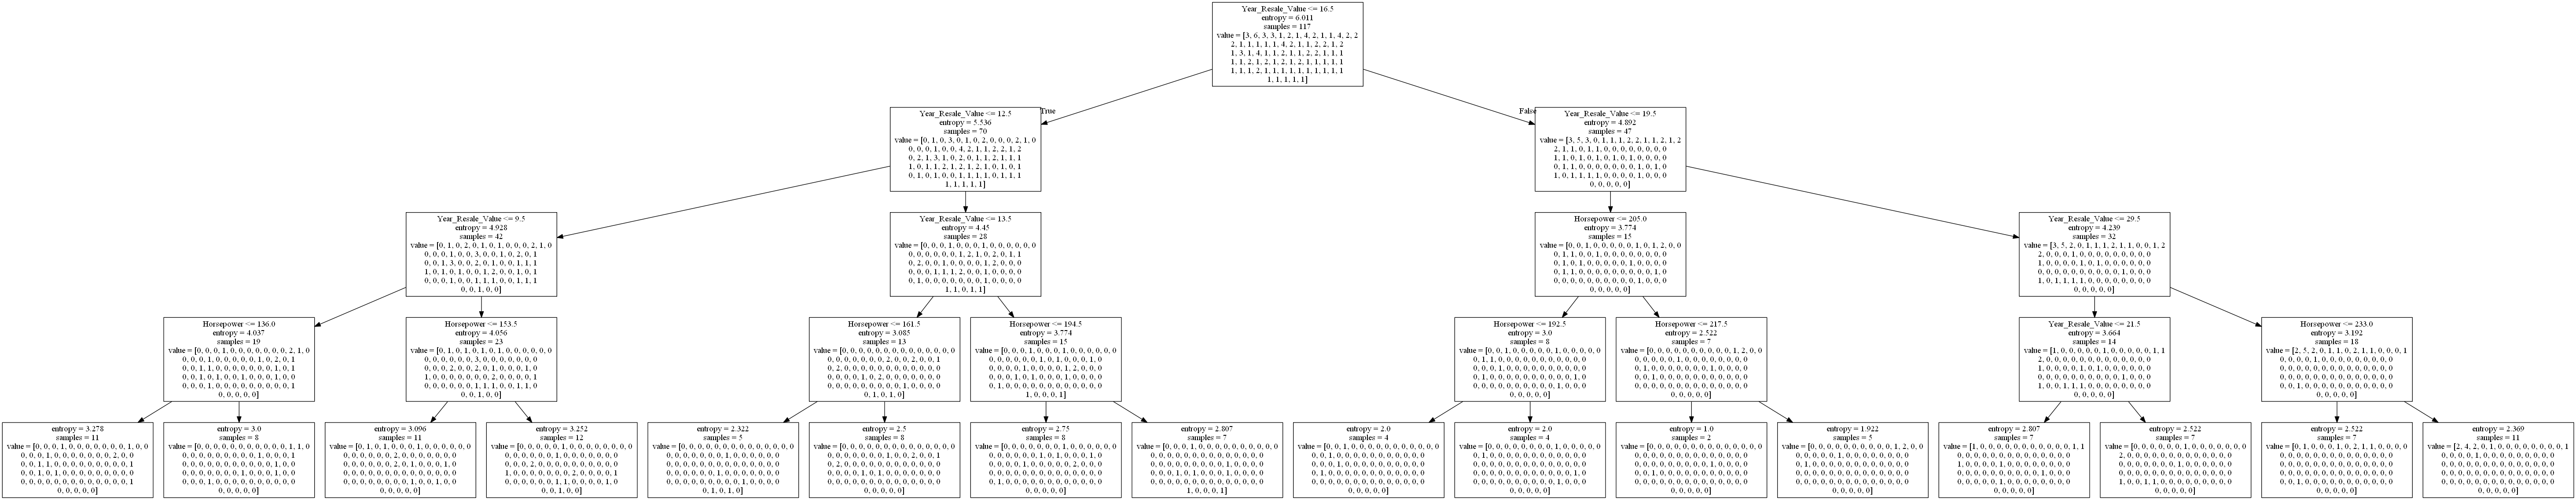

In [321]:
#Using parameters provided by Grid search cv and building the tree
decision_tree_skb = tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')



#decision_tree.fit(X_train, y_train)
decision_tree_skb.fit(X_train_skb, y_train_skb)
import pydotplus
import graphviz
# Render our tree.
dot_data_skb = tree.export_graphviz(
    decision_tree_skb, out_file=None,
    feature_names=X_skb.columns
)
graph = pydotplus.graph_from_dot_data(dot_data_skb)
Image(graph.create_png())

In [322]:
#holdout and cross validation for the decision tree after select kbest
#from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
#X_train, X_test, y_train, y_test = train_test_split(X_skb, Y_skb, test_size=0.4, random_state=20)
print('With 40% Holdout: ' + str(decision_tree_skb.fit(X_train_skb, y_train_skb).score(X_test_skb, y_test_skb)))
print('Testing on Sample: ' + str(decision_tree_skb.fit(X_skb, Y_skb).score(X_skb, Y_skb)))

With 40% Holdout: 0.02564102564102564
Testing on Sample: 0.19230769230769232


In [323]:
#Cross Vaidation
from sklearn.model_selection import cross_val_score
cross_val_score(decision_tree_skb, X_skb, Y_skb, cv=6)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


array([0.023, 0.   , 0.   , 0.111, 0.333, 1.   ])

In [324]:
#Classification Report
ypred = decision_tree_skb.predict(X_test_skb)
from sklearn import metrics
print(metrics.classification_report(ypred, y_test_skb))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.00      0.00      0.00         2
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       1.00      0.33      0.50         3
          8       0.00      0.00      0.00         0
          9       1.00      0.33      0.50         3
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0
         18       0.00      0.00      0.00         6
         20       1.00      0.25      0.40         4
         21       0.00      0.00      0.00         1
         24       0.00      0.00      0.00         2
         25       0.00      0.00      0.00         0
         26       0.00      0.00      0.00         0
         27       0.00      0.00      0.00         0
         28       0.00      0.00      0.00   

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [325]:
print(datetime.now()-start)

0:07:45.870014


# Conclusion:

Feature Selection model PCA looks to be more accurate with 70% of accuracy when using classification report where as Selectkbest is only 47%.The total time took to execute all the steps is 7 minutes